### Image classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_train_path="F:\\datasets\\Fruits_Vegetables\\Fruits_Vegetables\\train"
data_test_path="F:\\datasets\\Fruits_Vegetables\\Fruits_Vegetables\\test"
data_val_path="F:\\datasets\\Fruits_Vegetables\\Fruits_Vegetables\\validation"

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 35 classes.


In [6]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [7]:
data_ct = data_train.class_names
data_ct

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

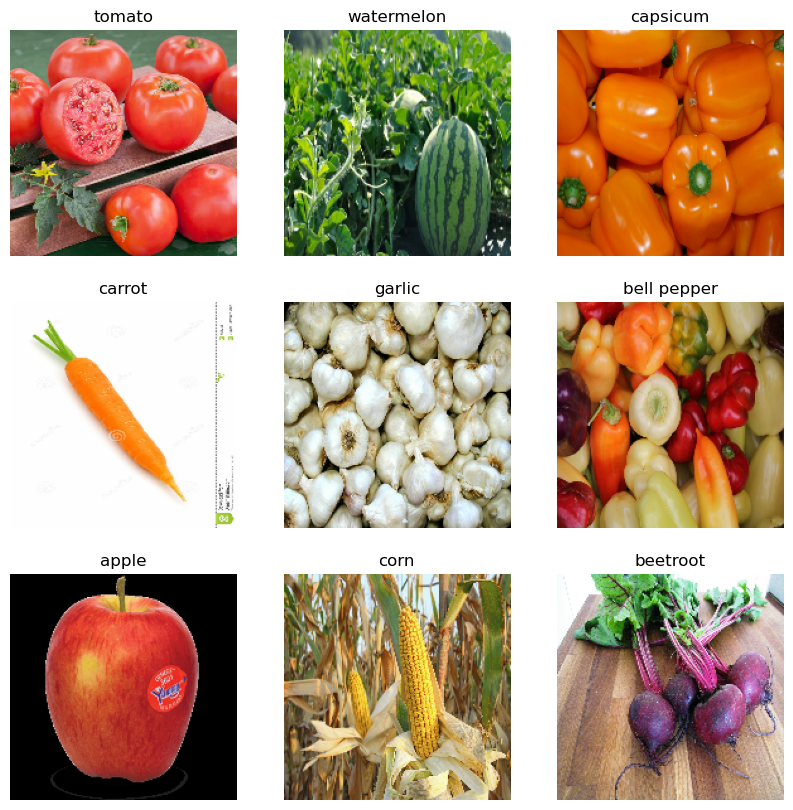

In [8]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_ct[labels[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
data_train    

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180,180,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_ct))])

In [12]:
#compiling
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [13]:
epochs_size = 5
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/5


98/98 [==============================] - 106s 938ms/step - loss: 3.2254 - accuracy: 0.1316 - val_loss: 2.1367 - val_accuracy: 0.3732
Epoch 2/5
98/98 [==============================] - 56s 533ms/step - loss: 2.3037 - accuracy: 0.3268 - val_loss: 1.4088 - val_accuracy: 0.6296
Epoch 3/5
98/98 [==============================] - 53s 508ms/step - loss: 1.8333 - accuracy: 0.4767 - val_loss: 0.9224 - val_accuracy: 0.7664
Epoch 4/5
98/98 [==============================] - 59s 565ms/step - loss: 1.2621 - accuracy: 0.6347 - val_loss: 0.5856 - val_accuracy: 0.8632
Epoch 5/5
98/98 [==============================] - 62s 594ms/step - loss: 0.7605 - accuracy: 0.7791 - val_loss: 0.4188 - val_accuracy: 0.9174


Text(0.5, 1.0, 'Loss')

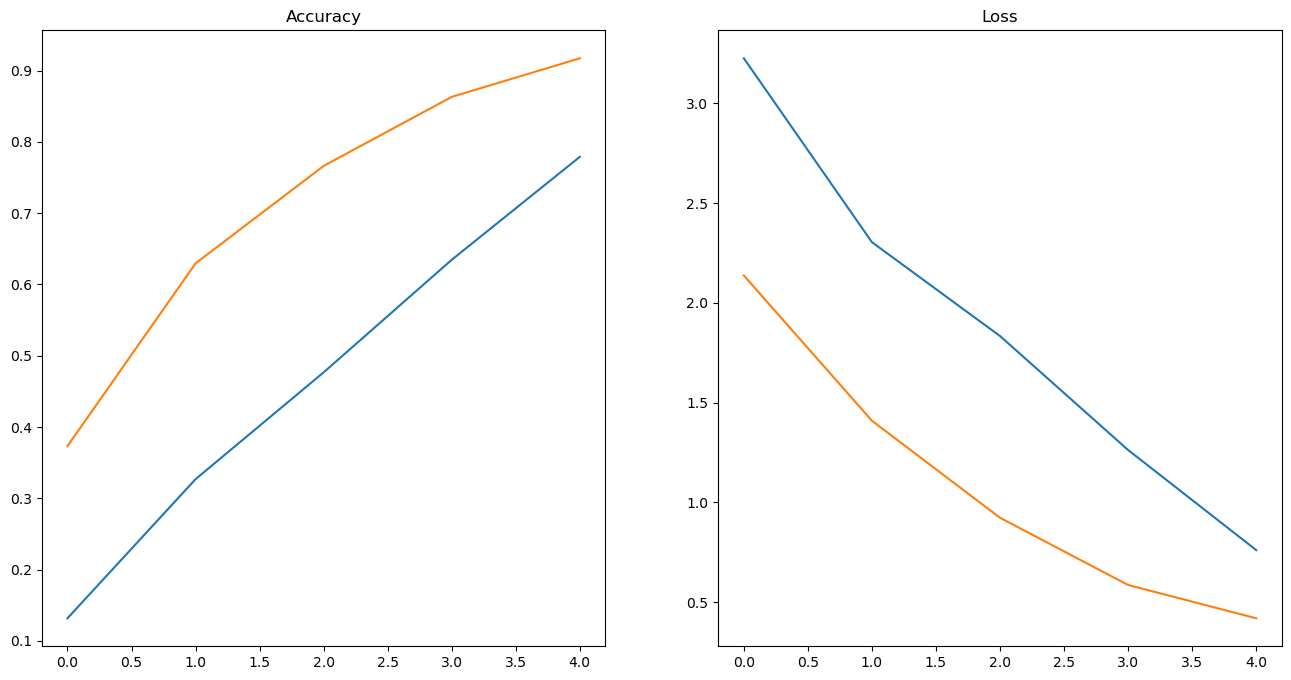

In [14]:
epochs_range = range(epochs_size)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

#### single prediction

In [15]:
image ="F:\\datasets\\images.jpeg"
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_b=tf.expand_dims(img_arr,0)

In [16]:
pred = model.predict(img_b)

1/1 [==============================] - 0s 189ms/step


In [17]:
score = tf.nn.softmax(pred)

In [18]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_ct[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is lemon with accuracy of 92.72


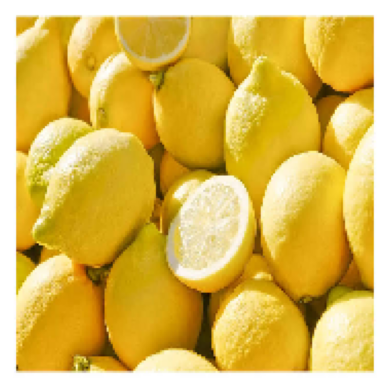

In [19]:
plt.imshow(image)
plt.axis('off')
plt.show()

### Gradio interface

In [20]:
#save the model
from tensorflow.keras.models import load_model
model.save("classification")

INFO:tensorflow:Assets written to: classification\assets


INFO:tensorflow:Assets written to: classification\assets


In [21]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

# Assuming img_height and img_width are defined
img_height, img_width = 180, 180  # Adjust these dimensions based on your model's input size

# Load the custom flower recognition model
model = tf.keras.models.load_model("C:\\Users\\katku\\OneDrive\\Desktop\\Anjali Valmiki\\classification")

# Define the labels
vegfruit_names = ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']

# Function to preprocess and classify the image
def classify_image(image):
    # Resize the image to the model's expected input size
    image = image.resize((img_width, img_height))
    img_arr = tf.keras.preprocessing.image.img_to_array(image)
    img_expanded = tf.expand_dims(img_arr, axis=0)
    
    # Make predictions using the custom flower recognition model
    predictions = model.predict(img_expanded)
    result = tf.nn.softmax(predictions[0])
    predicted_vegfruit= vegfruit_names[np.argmax(result)]
    confidence = np.max(result)
    
    # Format the result statement
    result_statement = 'Image is {}'.format(predicted_vegfruit)
    
    return result_statement, confidence

# Create a Gradio interface
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil"),
    outputs=["text", "number"],
    live=True,
    title="Fruit and Vegetable Classification",
    description="Upload an image for classification as fruit or vegetable."
)

# Launch the Gradio interface
iface.launch(inline=True)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


![ss](screenshot.png)